## Applying PCA from Scratch

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
#Getting data(IRIS Dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
 
#prepare the data
x = data.iloc[:,0:4]
 
#prepare the target
y = data.iloc[:,4]


In [26]:
#Final dimension
m = 2
#Step1: Calculate mean of data
mean = np.mean(x, axis=0)
#axis 0 means it will calculate the mean across columns

#Step2: Center the data using the mean(better to standardize to avoid loading on var with high variance)
x_centered = x - mean

#Step3: Calculate covariance matrix
S = np.cov(x_centered , rowvar = False) 
#default rowvar is true i.e. it assumes that the rows are the variables while columns are observations

#Step4: Find eigenvalues and eigenvectors of covariance matrix
e_val, e_vec = np.linalg.eigh(S)

#Step5: Extract M largest eigenvalues and eigenvectors
sort_temp = np.argsort(e_val)[::-1]
#store the indices or sorted eigenvalue to sort vectors accordingly, also want it in descending order
s_e_val = e_val[sort_temp]
s_e_vec = e_vec[:,sort_temp]
m_set = s_e_vec[:,0:m]

#Step6: Transform data using M EV
x_new = np.dot(m_set.transpose(),x_centered.transpose()).transpose()

#reduced data 
tr_data = pd.DataFrame(x_new, columns=['n1','n2'])

#add y back to dataset
tr_data = pd.concat([tr_data , pd.DataFrame(y)],axis = 1)


In [41]:
a = set(tr_data['target'])
a

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [44]:
tr_data['target']=tr_data['target'].replace(['Iris-setosa','Iris-virginica','Iris-versicolor'],[0,1,2])


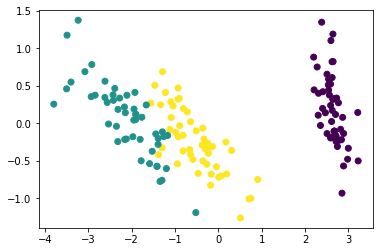

In [45]:
plt.figure()
plt.scatter(tr_data['n1'],tr_data['n2'], c=tr_data['target'])
#tr_data.head

In [ ]:
x_tr